In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from Testers import Tester
import pandas as pd
import random

In [ ]:
seed = 42
np.random.seed(seed)
random.seed(seed)

In [ ]:
data = datasets.load_digits()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from BaggingSA import BaggingSA
from Bagging import get_accuracy

reps = 30
n_trees = [5, 10, 15, 20]

fitness_acc = [0.5, 1, 0.6, 0.6] 
fitness_div = [0.25, 0, 0.4, 0]
fitness_qstat = [0.25, 0, 0, 0.4]


res = []
for acc, div, qstat in zip(fitness_acc, fitness_div, fitness_qstat):
    for n_tree in n_trees:
        for rep in range(reps):
            print(f"[REP] {reps} [N_TREES] {n_tree}")
            bagging_sa = BaggingSA(X=X_train, y=y_train, bags_with_replacement=False,
                                    T0=10, alpha=0.97, max_iterations=1200, n_trees=n_tree,
                                    fitness_acc=acc, fitness_div=div, fitness_qstat=qstat,)
            models_fitted, models_init, fitness = bagging_sa.run_simulated_annealing()
            
            accuracy_fitted = get_accuracy(X=X_test, y=y_test, models=models_fitted)
            accuracy_init = get_accuracy(X=X_test, y=y_test, models=models_init)
            res.append([n_tree, rep, accuracy_fitted, accuracy_init, fitness]) 
            print(f"Accuracy fitted: {accuracy_fitted} | Accuracy init: {accuracy_init}")
            
            df = pd.DataFrame(res, columns=["n_trees", "rep", "accuracy_fitted", "accuracy_init", "fitness"])
            df.to_csv(f"./../res/bagging_sa_fitness_{acc}_{div}_{qstat}.csv", index=False)

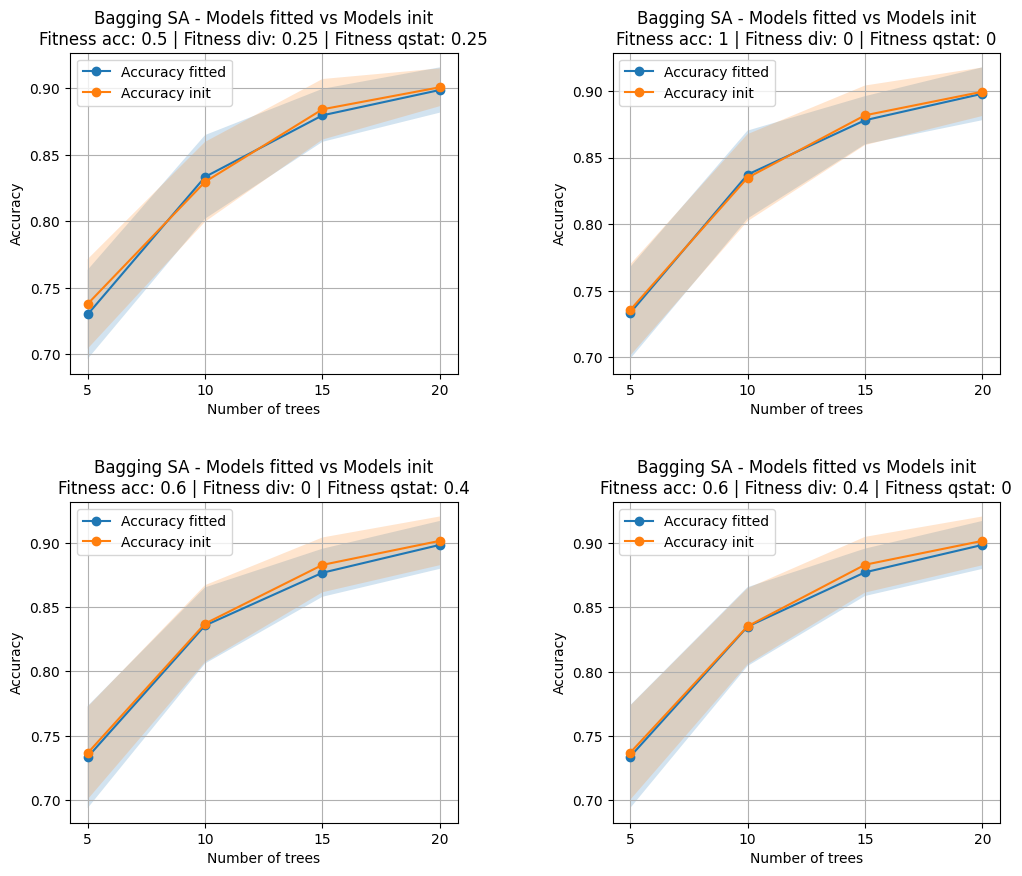

<Figure size 1500x1000 with 0 Axes>

In [17]:
# Create plot
import matplotlib.pyplot as plt
import pandas as pd

n_trees = [5, 10, 15, 20]
greeks = [
    [0.5, 0.25, 0.25],
    [1, 0, 0],
    [0.6, 0, 0.4],
    [0.6, 0.4, 0]
]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

X = n_trees
plt.figure(figsize=(15, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(int(len(greeks)/2)):
    for j in range(int(len(greeks)/2)):
        single = i * int(len(greeks)/2) + j
        greek = greeks[single]
        df = pd.read_csv(f"./../res/bagging_sa_fitness_{greek[0]}_{greek[1]}_{greek[2]}.csv") 
        
        Y1 = df.groupby("n_trees")["accuracy_fitted"].mean()
        Y_std1 = df.groupby("n_trees")["accuracy_fitted"].std()
        Y2 = df.groupby("n_trees")["accuracy_init"].mean()
        Y_std2 = df.groupby("n_trees")["accuracy_init"].std()
        
        axs[i, j].plot(X, Y1, label="Accuracy fitted", marker='o')
        axs[i, j].fill_between(X, Y1 - Y_std1, Y1 + Y_std1, alpha=0.2)
        axs[i, j].plot(X, Y2, label="Accuracy init", marker='o')
        axs[i, j].fill_between(X, Y2 - Y_std2, Y2 + Y_std2, alpha=0.2)
        axs[i, j].set_title(f"Bagging SA - Models fitted vs Models init\nFitness acc: {greek[0]} | Fitness div: {greek[1]} | Fitness qstat: {greek[2]}")
        axs[i, j].set_xlabel("Number of trees")
        axs[i, j].set_ylabel("Accuracy")
        axs[i, j].set_xticks(X)
        axs[i, j].grid()
        axs[i, j].legend()
        

plt.show()




    

In [ ]:
# fitness vs accuracy
X = df["fitness"]
Y1 = df.groupby("fitness")["accuracy_fitted"].mean()
Y_std1 = df.groupby("fitness")["accuracy_fitted"].std()
Y2 = df.groupby("fitness")["accuracy_init"].mean()
Y_std2 = df.groupby("fitness")["accuracy_init"].std()
plt.figure(figsize=(10, 5))
plt.plot(X, Y1, label="Accuracy fitted", marker='o')
plt.fill_between(X, Y1 - Y_std1, Y1 + Y_std1, alpha=0.2)
plt.plot(X, Y2, label="Accuracy init", marker='o')
plt.fill_between(X, Y2 - Y_std2, Y2 + Y_std2, alpha=0.2)
plt.title("BAccuracy vs Fitness")
plt.xlabel("Fitness")
plt.ylabel("Accuracy")
plt.xticks(X)
plt.grid()
plt.legend()
plt.show()
